In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('heatmapdata.csv')
df = pd.DataFrame(data)

In [29]:
df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
category,,,,,,,
00:00-05:59,805,705,603,581,721,747,880
06:00-11:59,772,942,867,914,917,986,809
12:00-17:59,1263,1479,1411,1501,1520,1569,1353
18:00-23:59,1083,1099,1156,1404,1260,1417,1236


In [26]:
# Display basic statistics
stats = df.describe()
stats

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
count,4.000000,4.00000,4.00000,4.000000,4.000000,4.000000,4.000000
mean,980.750000,1056.25000,1009.25000,1100.000000,1104.500000,1179.750000,1069.500000
std,234.225497,325.05115,350.33924,430.957848,355.456983,379.743225,265.747374
min,772.000000,705.00000,603.00000,581.000000,721.000000,747.000000,809.000000
25%,796.750000,882.75000,801.00000,830.750000,868.000000,926.250000,862.250000
50%,944.000000,1020.50000,1011.50000,1159.000000,1088.500000,1201.500000,1058.000000
75%,1128.000000,1194.00000,1219.75000,1428.250000,1325.000000,1455.000000,1265.250000
max,1263.000000,1479.00000,1411.00000,1501.000000,1520.000000,1569.000000,1353.000000


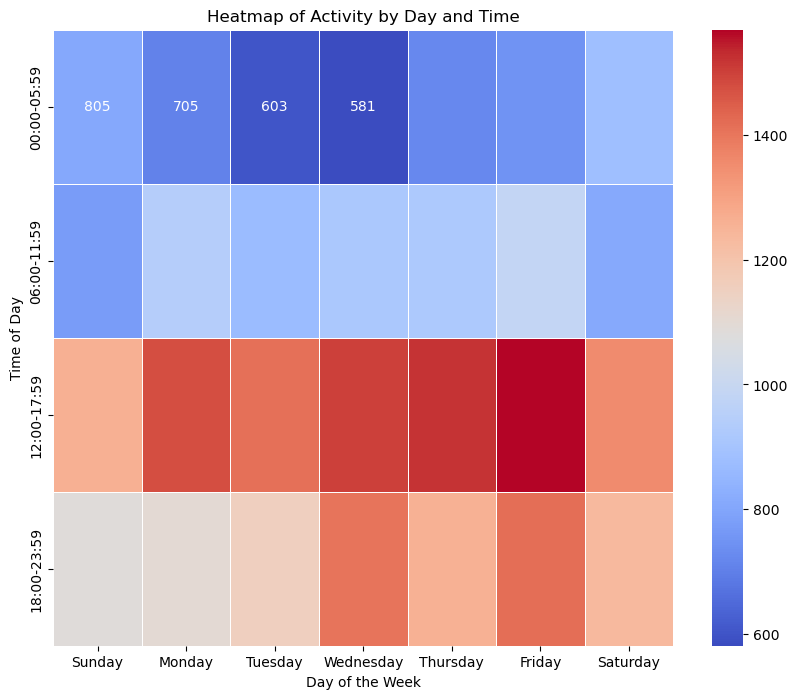

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.set_index('category', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Heatmap of Activity by Day and Time')
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')
plt.savefig("Heatmap by Day and Time")


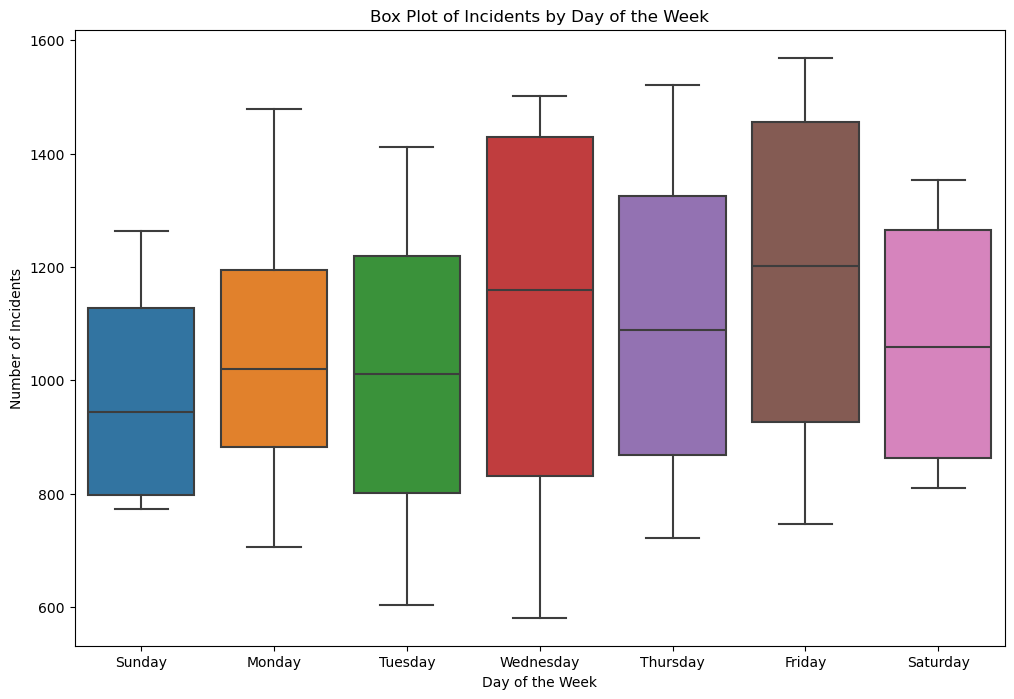

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data)
df.set_index('category', inplace=True)

# Convert the DataFrame from wide to long format
df_long = df.reset_index().melt(id_vars='category', var_name='Day', value_name='Incidents')

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Day', y='Incidents',data=df_long)
plt.title('Box Plot of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()


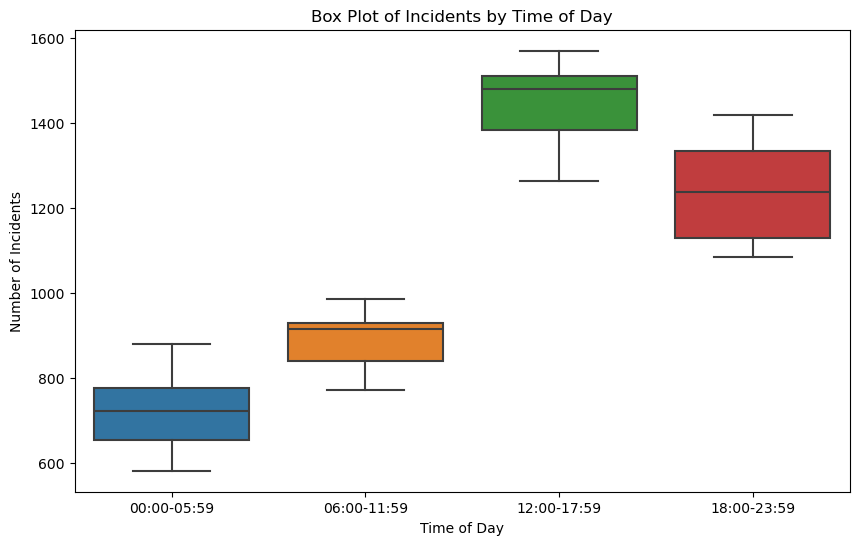

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_long = df.melt(id_vars='category', var_name='Day', value_name='Incidents')

# Aggregate data by category, ignoring the specific days
aggregated_data = df_long.groupby('category')['Incidents'].apply(list).reset_index()

# Exploding the list to separate rows for plotting
exploded_data = aggregated_data.explode('Incidents')

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='Incidents', data=exploded_data)
plt.title('Box Plot of Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.show()
